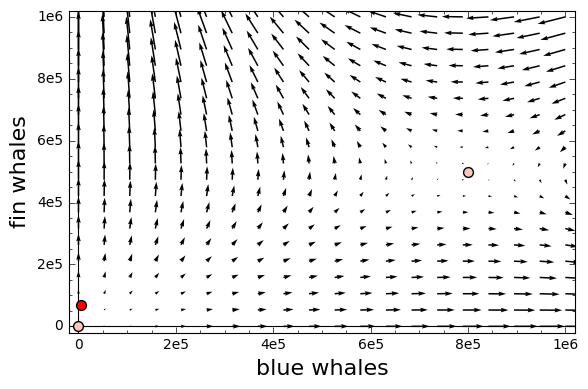

In [60]:
#growth(P) = r*P

#Variables

b = var('b') #population of blue whales
f = var('f') #population of fin whales
gb = var('gb') #growth rate of blue whale population per year
gf = var('gf') #growth rate of fin whale population per year
cb = var('cb') #competition factor for blue whale population per year
cf = var('cf') #competition factor for fin whale population per year
a = var('a') #competition coefficient
a = 1e-7
#Assumptions

gb(b) = .05*b
gf(f) = .08*f
cb = cf = a * b *f
fb = gb - cb
ff = gf - cf

grx = plot_vector_field((fb,ff),(b,0,1000000),(f,0,1000000), axes_labels =('blue whales','fin whales'))
grx += scatter_plot([[0,0],[800000,500000]])
grx += scatter_plot([[5000,70000]],facecolor='red')

show(grx)




In [33]:
solve([fb==0,ff==0],b,f)

[[b == 0, f == 0], [b == 800000, f == 500000]]

In [0]:
#The blue whales and fin whales can coexist, with the population of plue whales being 800 thousand, and the population of fin whales being 500 thousand. 

#After solving for the equilibrium points above, we plotted them at (0,0) and (8e5,5e5), we found that neither point is stable. 

#If we assume the initial conditions are at the red dot, then our model predicts runaway growth of the fin whales while blue whales increase in population much more slowly.


In [2]:
var('k','w') #Where k, w are the population sizes of krill and whales
gk = .25*k*(1-(k/500))
ck = -(.1/150000)*k*w
cw = (.02/500)*k*w
gw = .05*w*(1-(w/150000))
dkdt = gk+ck
dwdt = gw+cw
answers = solve([dkdt==0,dwdt==0],k,w)
print(answers)
assume(k>0,w>0)

[
[k == 0, w == 0],
[k == 500, w == 0],
[k == 0, w == 150000],
[k == (7500/29), w == (5250000/29)]
]


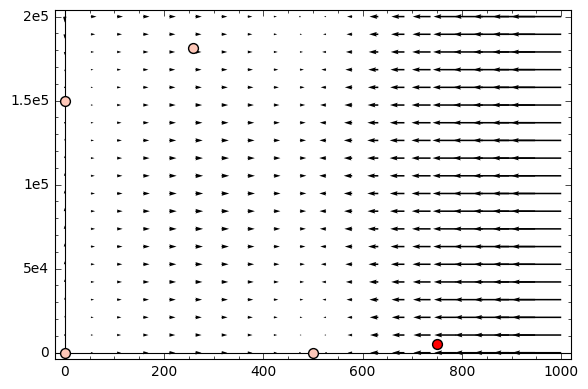

In [27]:
grx = plot_vector_field((dkdt,dwdt),(k,0,1000),(w,0,200000))
grx += scatter_plot([[750,5000]],facecolor='red')

In [0]:
#Let P1 = (0,0)
#P2 = (500,0)
#P3 = (0,150000)
#P4 ~= (259,181034)

#P1, P2, and P3 are unstable. P4 is stable.

#If we assume that our populations start at k=750, w=150000, then our model suggests that the krill population would decrease slowly as the whale population increased at a much faster rate.


In [12]:
k1 = 259
w1 = 181034

a = var('a')

gk = a*k*(1-(k/500))
ck = -(.1/150000)*k*w
cw = (.02/500)*k*w
gw = .05*w*(1-(w/150000))
dkdta = gk+ck
dwdta = gw+cw

answers = solve([dkdta==0,dwdta==0],w,k)
w2(a) = (answers[3][0].rhs())
k2(a) = (answers[3][1].rhs())
show(k2,w2)


sensitivity_w(a) = diff(w2(a),a)*a/w2(a)
sensitivity_k(a) = diff(k2(a),a)*a/k2(a)

show(sensitivity_w(.01))
show(sensitivity_k(.01))

In [0]:
# The equilibrium population levels of krill and whales are both very sensitive to the growth rate of the krill. If the growth rate of krill is increased 1%, the total population will increase by .8% while the whale population will decrease by .3%

In [29]:
#Assumptions:
#Seldom fatal
#Infected people become immune
#Infection requires direct contact
#Infectious period is 3 weeks
#last week, 18 new cases
#this week, 40 new cases
#30% is immune

#Variables

#S(t) = the number of susceptible individuals
#I(t) = number of infected individuals
#R(t) = number of recovered individuals
#k = the numer of individuals who recover per week
#n = the number of interactions per week
t = var('t')
S = var('S')
I = var('I')
R = var('R')
P = 100000
k = (1/3)
n = (40/(70000*18))

#Model
dS = -n *S*I
dI= n*S*I-k*I
dR = k*I

P = S+I+R
     
Si = 70000-18
Ii = 18
Ri = 30000



In [1]:
n = (40.0/(70000.0*18.0))
k = (.33)
dI(I,R)= n*(100000-I-R)*I-k*I
dR(I,R) = k*I
     
Ii = 18
Ri = 30000

def disSim(x0,y0,deltaX,deltaY,N):

    L = [(x0,y0)]
    iList = [x0]

    for i in range(N-1):
        xLast = L[-1][0]
        yLast = L[-1][1]
        L.append((xLast + deltaX(xLast,yLast),yLast + deltaY(xLast,yLast)))
        #iList.append((xLast+deltaX(xLast,yLast)))
    return L
m = disSim(Ii,Ri,dI,dR,100)

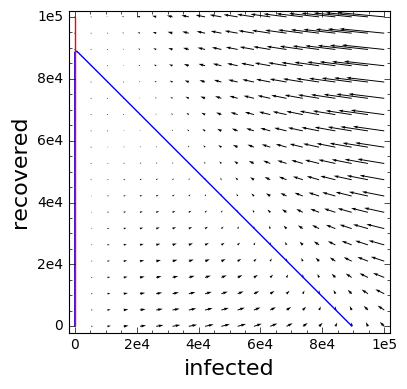

In [2]:
grx = plot_vector_field((dI,dR),(I,0,100000),(R,0,100000), axes_labels = ['infected','recovered'])
grx+= implicit_plot(dI==0,(I,0,100000),(R,0,100000), axes_labels = ['infected','recovered'])
grx += implicit_plot(dR==0,(I,0,100000),(R,0,100000), axes_labels = ['infected','recovered'], color = 'red')
show(grx)

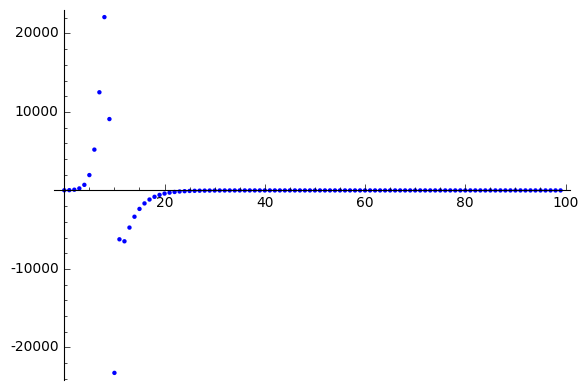

In [21]:
def infection(x0,y0,deltaX,deltaY,N):

    L = [(x0,y0)]
    iList = [x0]

    for i in range(N-1):
        xLast = L[-1][0]
        yLast = L[-1][1]
        L.append((xLast + deltaX(xLast,yLast),yLast + deltaY(xLast,yLast)))
        iList.append((deltaX(xLast,yLast)))
    return iList
t = infection(Ii,Ri,dI,dR,100)

list_plot(q)

In [20]:
max(q)

22073.9733961382

In [0]:
q[8]

In [14]:
q[8]-q[7]

9573.15832415288

In [15]:
#As we can see from this chart, the most infections occur at week 9 (n[8] because python is zero-indexed), with ~23,000 more cases than the previous week.

In [16]:
n = (40.0/(70000.0*18.0))
k = .33
dI(I,R)= n*(100000.0-I-R)*I-k*I
dR(I,R) = k*I
     
Ii = 18
Ri = 30000

o = disSim(Ii,Ri,dI,dR,100)
p = infection(Ii,Ri,dI,dR,100)

show(max(p)==p[8])
show(q[8])
#A small increase in k (+10%) does not change the number of infected individuals at week 9. 


In [17]:
n = (40.0/(70000.0*18.0))
k = .27
dI(I,R)= n*(100000.0-I-R)*I-k*I
dR(I,R) = k*I
     
Ii = 18
Ri = 30000

o = disSim(Ii,Ri,dI,dR,100)
p = infection(Ii,Ri,dI,dR,100)

show(max(p)==p[8])
show(q[8])
#A small increase in k (-10%) will increase the number of infected individuals at week 9 by 11%. 

In [18]:
(max(p)-q[8])/q[8]

0.163696755969397

In [19]:
n = (40.0/(70000.0*19))
k = .30
dI(I,R)= n*(100000.0-I-R)*I-k*I
dR(I,R) = k*I
     
Ii = 18
Ri = 30000

r = disSim(Ii,Ri,dI,dR,100)
s = infection(Ii,Ri,dI,dR,100)

max(s)

22073.9733961382

In [11]:
(max(s)-q[8])/q[8] #An increase of a single case in week 1 will yield a 7.7% increase in infections by week 9. 

0.0776298554876917